In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from aqua import Reader
import nc_time_axis

In [2]:
reader = Reader(model='EC-EARTH4', exp='lfr6', source='atm-2d-monthly', regrid='r100')

2024-05-24 09:37:05 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /ec/res4/scratch/itmn/data/AQUA/datasets


In [3]:
data = reader.retrieve()

2024-05-24 09:37:44 :: eccodes :: WARNING  -> ShortName tprate has multiple grib codes associated: ['260048', '172228']
2024-05-24 09:37:44 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2024-05-24 09:37:44 :: Reader :: WARNING  -> Coordinate plev not found
2024-05-24 09:37:44 :: Reader :: ERROR    -> Variable bounds_lon has no units!
2024-05-24 09:37:44 :: Reader :: ERROR    -> Variable bounds_lat has no units!
2024-05-24 09:37:44 :: Reader :: ERROR    -> Variable time_centered_bounds has no units!
2024-05-24 09:37:44 :: Reader :: ERROR    -> Variable time_counter_bounds has no units!


In [4]:
data

<xarray.Dataset> Size: 5GB
Dimensions:               (time: 4320, cell: 6114, nvertex: 4, axis_nbounds: 2)
Coordinates:
    lat                   (cell) float32 24kB dask.array<chunksize=(6114,), meta=np.ndarray>
    lon                   (cell) float32 24kB dask.array<chunksize=(6114,), meta=np.ndarray>
  * time                  (time) object 35kB 1990-01-16 12:00:00 ... 2349-12-...
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/40)
    bounds_lon            (time, cell, nvertex) float32 423MB dask.array<chunksize=(12, 6114, 4), meta=np.ndarray>
    bounds_lat            (time, cell, nvertex) float32 423MB dask.array<chunksize=(12, 6114, 4), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) object 69kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) object 69kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    tas                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    tasmin                (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    ...                    ...
    rlntcs                (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    iwp                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    clh                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    clm                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    cll                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
    alb                   (time, cell) float32 106MB dask.array<chunksize=(1, 6114), meta=np.ndarray>
Attributes:
    name:         output/oifs/lfr6_atm_cmip6_1m
    description:  ECE4/OIFS monthly surface fields
    title:        ECE4/OIFS monthly surface fields
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-30 12:27:34 GMT
    uuid:         5b31214b-c351-4e0a-a795-9ef83e786c2d
    history:      \n2024-05-24 09:37:44 AQUA💧: Retrieved from EC-EARTH4_lfr6_...

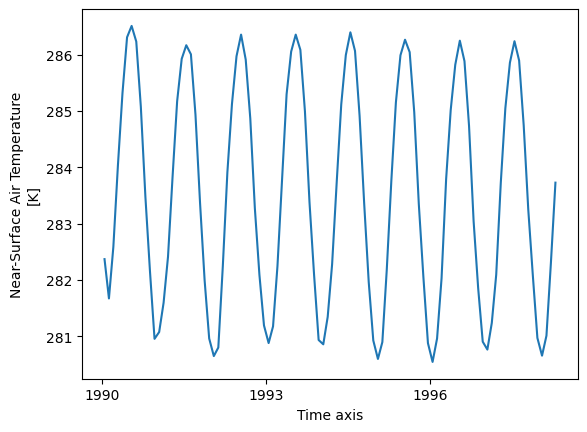

In [4]:
data['tas'].isel(time=slice(0,100)).aqua.fldmean().plot()

In [5]:
hreader = Reader(model='ERA5', exp='era5', source='monthly')

2024-05-24 09:37:51 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /ec/res4/scratch/itmn/data/AQUA/datasets


In [6]:
hdata = hreader.retrieve(startdate='1990',enddate='2000')

2024-05-24 09:37:53 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-05-24 09:37:53 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right
2024-05-24 09:37:53 :: eccodes :: WARNING  -> ShortName lcc has multiple grib codes associated: ['3073', '186']
2024-05-24 09:37:53 :: eccodes :: WARNING  -> AQUA will take the first so that lcc -> 3073, please set up a correct fix if this does not look right
2024-05-24 09:37:53 :: eccodes :: WARNING  -> ShortName mcc has multiple grib codes associated: ['3074', '187']
2024-05-24 09:37:53 :: eccodes :: WARNING  -> AQUA will take the first so that mcc -> 3074, please set up a correct fix if this does not look right
2024-05-24 09:37:53 :: eccodes :: WARNING  -> ShortName hcc has multiple grib codes associated: ['3075', '188']
2024-05-24 09:37:53 :: eccodes :: WARNING  -> AQUA will take the first so that hcc -> 3075, please set u

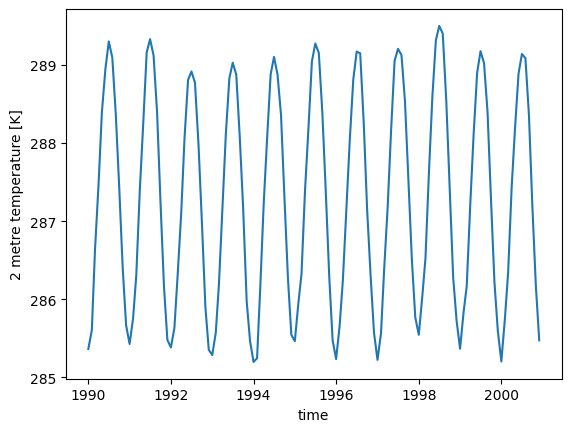

In [7]:
hreader.fldmean(hdata['2t']).plot()

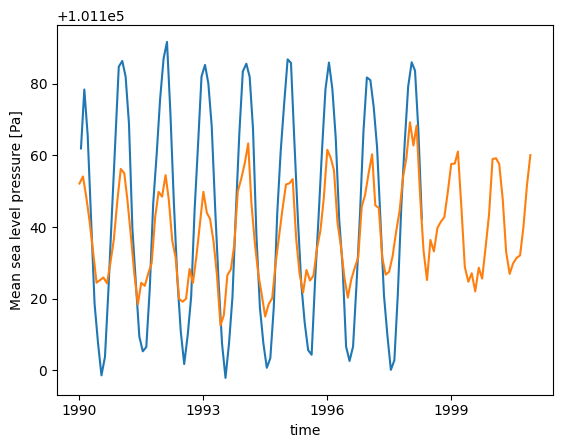

In [8]:
reader.fldmean(data['msl'].isel(time=slice(0,100))).plot()
hreader.fldmean(hdata['msl']).convert_calendar('noleap').plot()